In [1]:
!pip install tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
path = 'C:/Users/arshg/OneDrive/Desktop/ecg-csv/ecg-csv/ecg.csv'
df = pd.read_csv(path,header=None)

In [1]:
df = df.drop(140, axis=1) 
df

NameError: name 'df' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
df = StandardScaler.fit_transform(df)

In [5]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

In [6]:
print(x_train.shape[1])
print(x_test.shape[1])
type(x_train)

140
140


numpy.ndarray

In [7]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [8]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder
])

In [9]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [10]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=10,
    batch_size = 30,
    shuffle=True
)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7038 - val_loss: 0.4230
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3600 - val_loss: 0.3588
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3214 - val_loss: 0.3204
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2867 - val_loss: 0.2966
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2702 - val_loss: 0.2849
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2574 - val_loss: 0.2717
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2459 - val_loss: 0.2590
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2361 - val_loss: 0.2472
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2250 - val_loss: 0.2412
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2188 - val_loss: 0.2321


<Axes: >

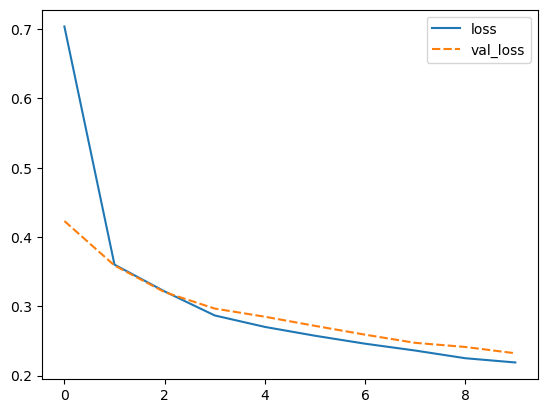

In [11]:
import seaborn as sns
sns.lineplot(model.history.history)

In [12]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [13]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

np.float64(0.6273254755674649)

In [14]:
anomalies = mse > threshold

In [15]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


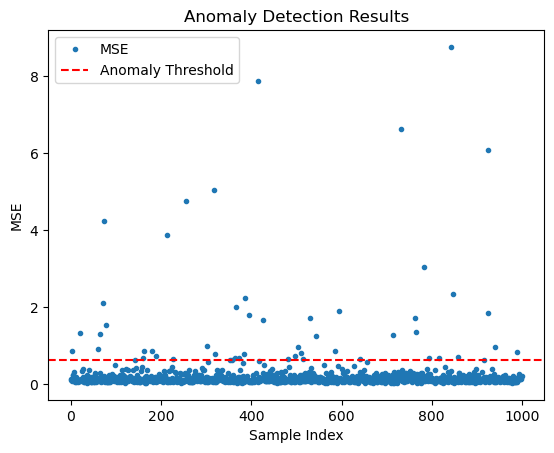

In [16]:
#Plot the anomalies
import matplotlib.pyplot as plt

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

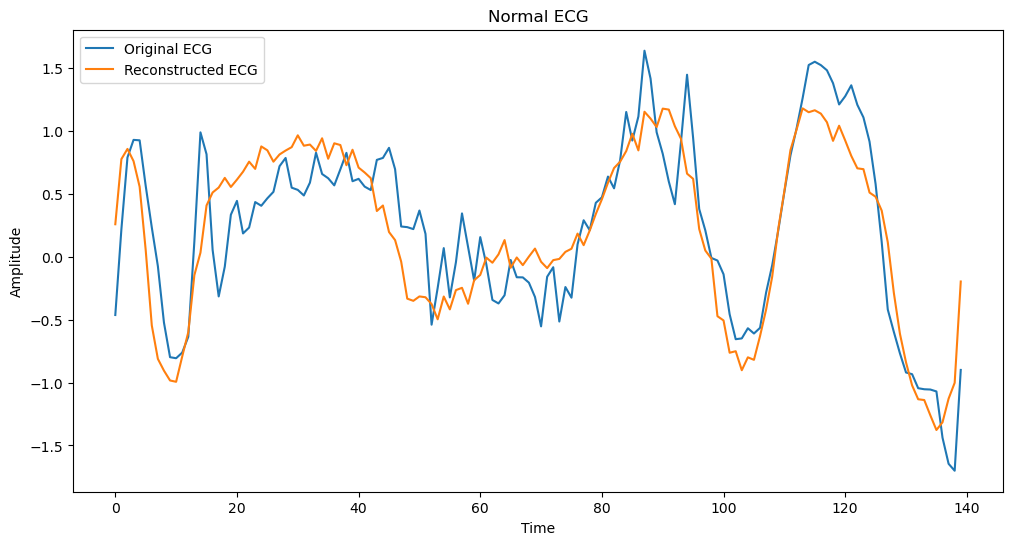

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

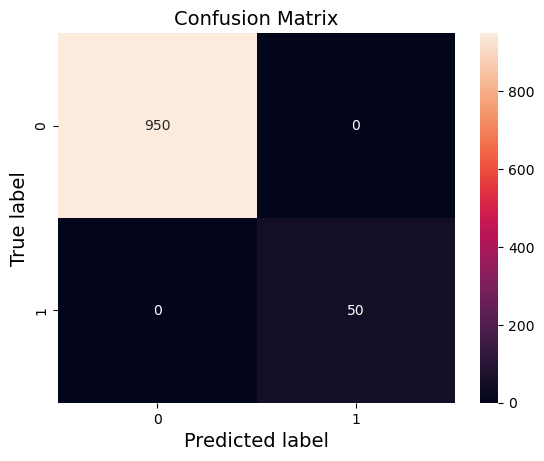

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()